<a href="https://colab.research.google.com/github/AntonioGarciaData/Valor_TI/blob/main/Supervised_models%20/Decission_Tree/Tarea_Parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1 align=center><font size = 5>Santander Customer Satisfaction
</font></h1>

---

## Tabla de Contenidos

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
1. <a href="#item31">Introducción</a>  
2. <a href="#item32">Santander Problem</a>  
3. <a href="#item33">Descargar y limpiar el Dataset</a>  
4. <a href="#item34">SMOTE Algorithm</a>  
5. <a href="#item34">Decision Trees</a>  
7. <a href="#item34">Cross Validation y GridSearch</a>  
6. <a href="#item34">Random Forest</a>  
8. <a href="#item34">AdaBoost</a>  
9. <a href="#item34">XGBoost</a>
10. <a href="#item34">RandomSearch</a>
11. <a href="#item34">¿Cómo implementar un modelo?</a>  

</font>
</div>

## Introducción


En este laboratorio, aprenderá a usar python para construir modelos de ensemble.


<h3>Objetivo de este Notebook<h3>    
<h5> 1. Como construir e interpretar un modelo de ensemble.</h5>
<h5> 2. Descargar y limpiar un Dataset </h5>
<h5> 3. Realizar los pasos necesarios previos a la etapa de modelamiento </h5>
<h5> 4. Entrenar y Testear modelo </h5>     

Primero, importemos algunos módulos que necesitaremos para el análisis y construcción del modelo.

In [1]:

# Scikit-Learn
import sklearn
assert sklearn.__version__ >= "0.20"

# Imports comunes
import pandas as pd
import numpy as np
import os

# Configuración de tamaño de gráficos matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore las advertencias poco útiles
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Santander Customer Satisfaction


Desde los equipos de soporte de primera línea hasta los ejecutivos, la satisfacción del cliente es una medida clave del éxito de una empresa. Los clientes insatisfechos no se quedan. Es más, los clientes insatisfechos rara vez expresan su insatisfacción antes de irse.

El banco Santander está pidiendo a la comunidad data scientist que los ayude a identificar clientes insatisfechos desde su primera interacción. Hacerlo permitiría a Santander tomar medidas proactivas para mejorar la felicidad de un cliente antes de que sea demasiado tarde.

En este laboratorio, trabajará con cientos de variables anónimas para predecir si un cliente está satisfecho o insatisfecho con su experiencia bancaria.

<img src="https://storage.googleapis.com/kaggle-media/competitions/kaggle/4986/media/santander_custsat_red.png" alt="HTML5 Icon" style="width: 600px; height: 450px;">
<div style="text-align: center">¿Qué clientes son clientes satisfechos? </div>


<b>Descripción de datos</b>

El data frame de Santander tiene 76,020 filas y 371 columnas.


---

Se le proporciona un conjunto de datos anónimos que contiene una gran cantidad de variables numéricas. La columna <b>"OBJETIVO"</b> es la variable a predecir. Es igual a uno para clientes insatisfechos y 0 para clientes satisfechos.

La tarea consiste en predecir la probabilidad de que cada cliente del conjunto de prueba sea un cliente insatisfecho.


---


<strong>Puede consultar este [link](https://www.kaggle.com/c/santander-customer-satisfaction/overview) para leer más sobre la fuente de datos Santander.</strong>


## Descargar y limpiar Dataset


In [2]:
# Cargar Data
import pandas as pd
pddf = pd.read_csv("santander.csv")
pddf.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [3]:
pddf.shape

(76020, 371)

In [4]:
# Cargar seaborn
import seaborn as sns
sns.set(style="whitegrid", color_codes = True)
sns.set(rc={'figure.figsize':(10,6)})

<Axes: xlabel='TARGET', ylabel='count'>

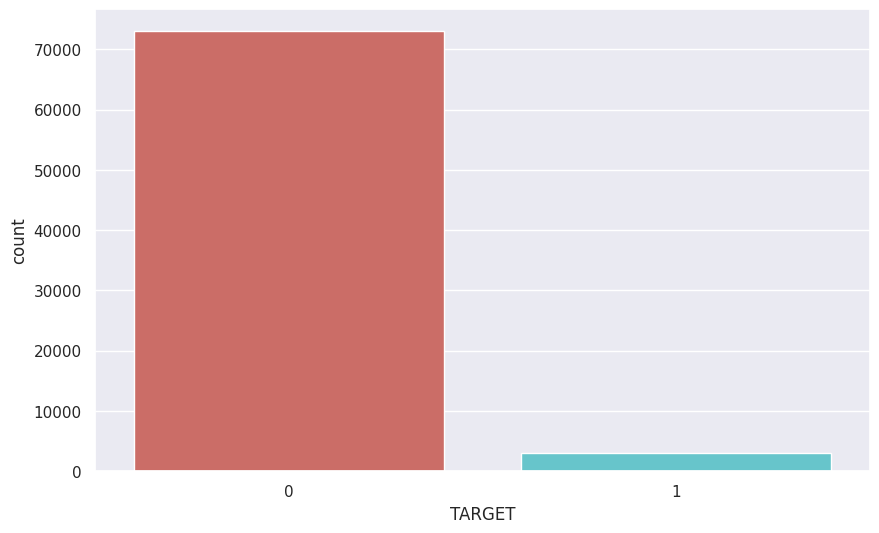

In [5]:
# Analizando el target
sns.countplot(x = 'TARGET', data = pddf, palette = 'hls')


In [6]:
pddf.groupby('TARGET')['ID'].count()

TARGET
0    73012
1     3008
Name: ID, dtype: int64

In [7]:
pddf[['TARGET']].describe()

,TARGET
count,76020.000000
mean,0.039569
std,0.194945
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [8]:
# Indentificar las variables

features = list(set(pddf.columns.tolist()) - set(['ID','TARGET']))
features

['ind_var18',
 'imp_trasp_var33_out_ult1',
 'num_ent_var16_ult1',
 'num_trasp_var33_in_ult1',
 'num_var12_0',
 'imp_op_var40_comer_ult1',
 'imp_op_var41_comer_ult3',
 'num_var32',
 'saldo_medio_var44_ult1',
 'saldo_var28',
 'num_var42',
 'imp_var43_emit_ult1',
 'num_var12',
 'ind_var14_0',
 'imp_aport_var33_ult1',
 'saldo_medio_var12_ult3',
 'delta_num_venta_var44_1y3',
 'ind_var24_0',
 'ind_var33_0',
 'ind_var40_0',
 'num_var8',
 'num_var29_0',
 'num_var8_0',
 'num_aport_var33_ult1',
 'ind_var39',
 'saldo_medio_var13_corto_hace3',
 'num_var30',
 'saldo_medio_var29_ult1',
 'num_compra_var44_hace3',
 'ind_var9_cte_ult1',
 'ind_var27',
 'ind_var25_cte',
 'saldo_medio_var17_ult3',
 'imp_trasp_var17_in_ult1',
 'num_op_var41_ult1',
 'var36',
 'num_meses_var8_ult3',
 'delta_imp_trasp_var17_in_1y3',
 'imp_reemb_var17_ult1',
 'saldo_var46',
 'saldo_var13_medio',
 'saldo_medio_var33_ult3',
 'num_op_var40_efect_ult1',
 'ind_var2',
 'num_var41',
 'num_var18',
 'saldo_var13_corto',
 'imp_var7_emit

In [9]:
# Determinando matrices de datos

X = pddf[features]
y = pddf.TARGET


In [10]:
# Muestreo de data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 123)


In [11]:
y_train.mean()

0.039576051415041155

In [12]:
y_test.mean()

0.03955099535210033

# SMOTE Algorithm


<b>Synthetic Minority Oversampling Technique</b>

Es uno de los métodos de sobremuestreo más utilizados para resolver el problema del desbalanceo.
Su objetivo es equilibrar la distribución de clases aumentando aleatoriamente los ejemplos de clases minoritarias al replicarlos.


SMOTE sintetiza nuevas instancias minoritarias entre instancias minoritarias existentes. Genera los registros de entrenamiento virtual por interpolación lineal para la clase minoritaria. Estos registros de entrenamiento sintéticos se generan seleccionando aleatoriamente uno o más de los k vecinos más cercanos para cada ejemplo en la clase minoritaria. Después del proceso de sobremuestreo, los datos se reconstruyen y se pueden aplicar varios modelos de clasificación para los datos procesados.
¡Más información detallada sobre cómo funciona el algoritmo SMOTE!

<strong>Puede consultar este [link](https://imbalanced-learn.org/stable/generated/imblearn.over_sampling.SMOTE.html) para leer más sobre SMOTE.</strong>

<img src="https://i.ytimg.com/vi/U3X98xZ4_no/maxresdefault.jpg" alt="HTML5 Icon" style="width: 400px; height: 250px;">





In [13]:
# Aplicando SMOTE para oversampling

from imblearn.over_sampling import SMOTE


In [14]:
sm = SMOTE(random_state = 123)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())


<Axes: ylabel='count'>

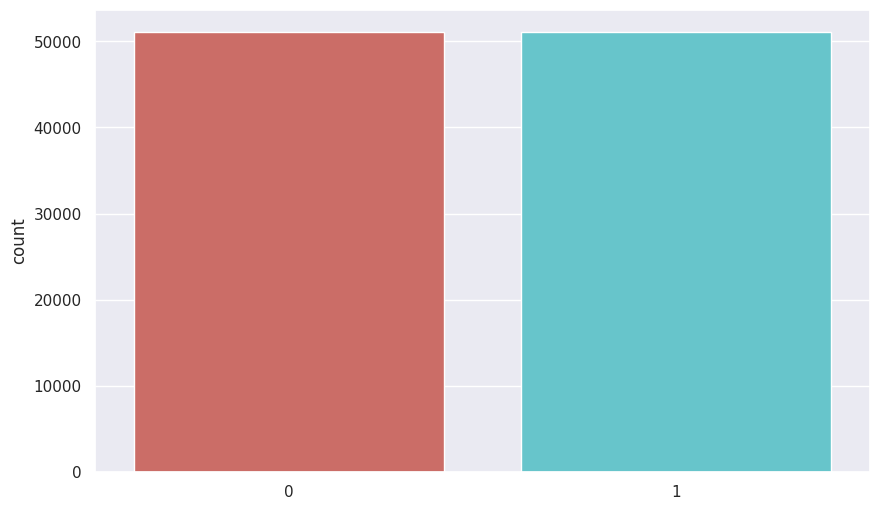

In [15]:
# Analizando el target
sns.countplot(x = y_train_res, palette = 'hls')

# Decision Tree

In [16]:
# Cargar librerías

from sklearn.tree import DecisionTreeClassifier


In [17]:
# Definiendo modelo


dtree = DecisionTreeClassifier(max_depth = 5,
                               #class_weight = {0: 1, 1: 25.272},
                               min_samples_leaf = 0.05,
                               random_state = 123)

dtree = dtree.fit(X_train_res, y_train_res)

dtree

DecisionTreeClassifier(max_depth=5, min_samples_leaf=0.05, random_state=123)

In [18]:
# Graficando resultados

from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

dot_data = export_graphviz(dtree,
                           feature_names = features,
                           filled = True,
                           rounded = True,
                           special_characters = True)

graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')
print(graph)


<b>Bondad de ajuste</b>

In [19]:
# Usando el modelo para predecir

X_train['probability'] = dtree.predict_proba(X_train[features])[:,1]
X_test['probability']  = dtree.predict_proba(X_test[features])[:,1]

X_train['prediction'] = dtree.predict(X_train[features])
X_test['prediction']  = dtree.predict(X_test[features])

In [20]:
#Resumen de todas las métricas del modelo
from sklearn.metrics import *

metricsDtree_smote = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'dTree_smote_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'dTree_smote_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metricsDtree_smote

,metric,dTree_smote_train,dTree_smote_test
0,AUC,0.800894,0.799110
1,Gini,0.601789,0.598221
2,Accuracy,0.783309,0.788389
3,Precision,0.112491,0.115143
4,Recall,0.649573,0.650776
5,F1-score,0.191771,0.195667


### balanceo por pesos

In [21]:
# Muestreo de data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 123)


In [22]:
y_train.shape[0] - y_train.sum()

51108

In [23]:
y_train.sum()

2106

In [24]:
(y_train.shape[0] - y_train.sum())/y_train.sum()

24.267806267806268

In [25]:
# Definiendo modelo


dtree = DecisionTreeClassifier(max_depth = 5,
                               class_weight = {0: 1, 1: 24.267},
                               min_samples_leaf = 0.05,
                               random_state = 123)

dtree = dtree.fit(X_train, y_train)

dtree

DecisionTreeClassifier(class_weight={0: 1, 1: 24.267}, max_depth=5,
                       min_samples_leaf=0.05, random_state=123)

In [26]:
# Usando el modelo para predecir

X_train['probability'] = dtree.predict_proba(X_train[features])[:,1]
X_test['probability']  = dtree.predict_proba(X_test[features])[:,1]

X_train['prediction'] = dtree.predict(X_train[features])
X_test['prediction']  = dtree.predict(X_test[features])

In [27]:
#Resumen de todas las métricas del modelo
from sklearn.metrics import *

metricsDtree_w = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'dTree_w_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'dTree_w_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metricsDtree_w

,metric,dTree_w_train,dTree_w_test
0,AUC,0.820066,0.802990
1,Gini,0.640132,0.605980
2,Accuracy,0.704645,0.707402
3,Precision,0.099323,0.095472
4,Recall,0.801045,0.754989
5,F1-score,0.176732,0.169508


In [29]:
# Definiendo modelo

dtree_unb = DecisionTreeClassifier(max_depth = 5,
                               min_samples_leaf = 0.05,
                               random_state = 123)

dtree_unb = dtree_unb.fit(X_train[features], y_train)

# Usando el modelo para predecir

X_train['probability_unb'] = dtree_unb.predict_proba(X_train[features])[:,1]
X_test['probability_unb']  = dtree_unb.predict_proba(X_test[features])[:,1]

X_train['prediction_unb'] = dtree_unb.predict(X_train[features])
X_test['prediction_unb']  = dtree_unb.predict(X_test[features])

#Resumen de todas las métricas del modelo
metricsDtree_unb = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'dTree_unb_train':[roc_auc_score(y_train, X_train.probability_unb),
                                        (roc_auc_score(y_train, X_train.probability_unb)*2-1),
                                        accuracy_score(y_train, X_train.prediction_unb),
                                        precision_score(y_train, X_train.prediction_unb),
                                        recall_score(y_train, X_train.prediction_unb),
                                        f1_score(y_train, X_train.prediction_unb)],

                                'dTree_unb_test':[roc_auc_score(y_test, X_test.probability_unb),
                                        (roc_auc_score(y_test, X_test.probability_unb)*2-1),
                                        accuracy_score(y_test, X_test.prediction_unb),
                                        precision_score(y_test, X_test.prediction_unb),
                                        recall_score(y_test, X_test.prediction_unb),
                                        f1_score(y_test, X_test.prediction_unb)]})
metricsDtree_unb

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,metric,dTree_unb_train,dTree_unb_test
0,AUC,0.823127,0.804982
1,Gini,0.646253,0.609964
2,Accuracy,0.960424,0.960449
3,Precision,0.000000,0.000000
4,Recall,0.000000,0.000000
5,F1-score,0.000000,0.000000


In [30]:
temp = pd.merge(metricsDtree_smote, metricsDtree_w, on = ['metric'], how= 'left')
pd.merge(temp, metricsDtree_unb, on = ['metric'], how= 'left')



,metric,dTree_smote_train,dTree_smote_test,dTree_w_train,dTree_w_test,dTree_unb_train,dTree_unb_test
0,AUC,0.800894,0.799110,0.820066,0.802990,0.823127,0.804982
1,Gini,0.601789,0.598221,0.640132,0.605980,0.646253,0.609964
2,Accuracy,0.783309,0.788389,0.704645,0.707402,0.960424,0.960449
3,Precision,0.112491,0.115143,0.099323,0.095472,0.000000,0.000000
4,Recall,0.649573,0.650776,0.801045,0.754989,0.000000,0.000000
5,F1-score,0.191771,0.195667,0.176732,0.169508,0.000000,0.000000


In [31]:
X_train['TARGET'] = y_train

<Axes: >

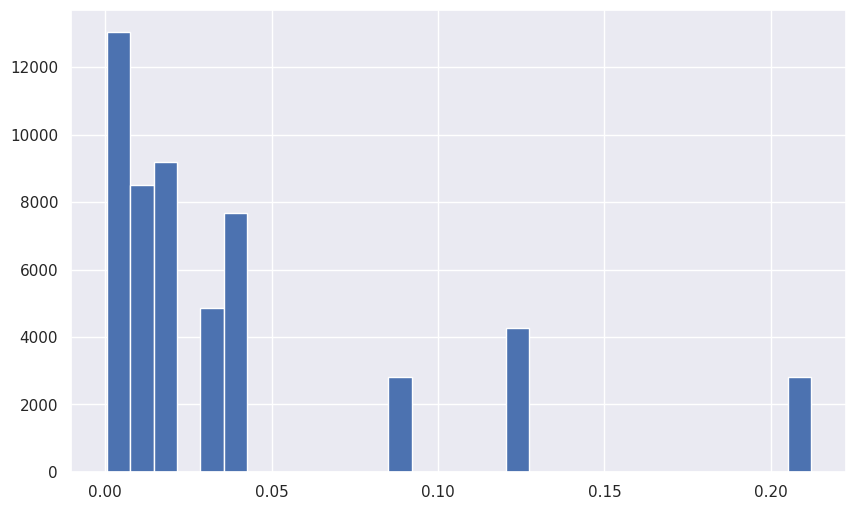

In [32]:
X_train.probability_unb.hist(bins = 30)

In [ ]:
X_train.loc[X_train.probability_unb < 0.04].TARGET.mean()

0.016576626494897724

<Axes: >

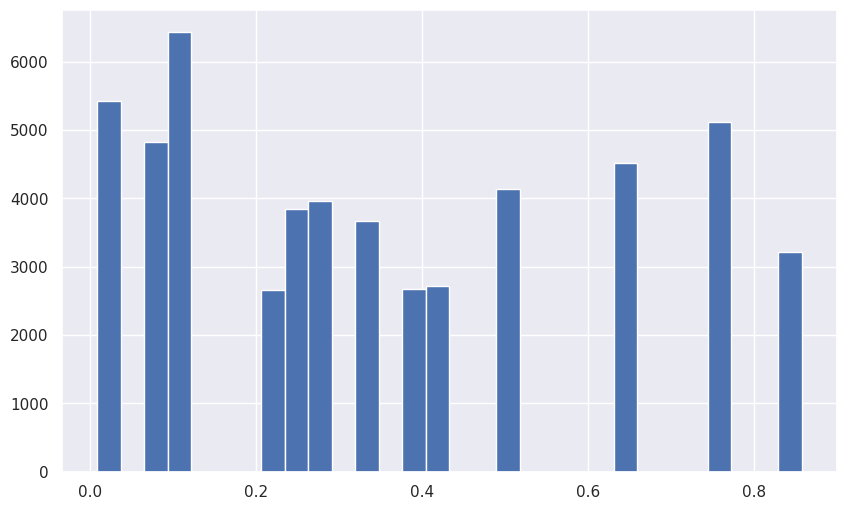

In [ ]:
X_train.probability.hist(bins = 30)

In [ ]:
X_train.loc[X_train.probability < 0.04].TARGET.mean()

0.0007365126127784938

# Cross Validation



<b>evaluar el desempeño del estimador</b>

 ---

Aprender los parámetros de una función de predicción y probarlos con los mismos datos es un error metodológico: un modelo que simplemente repetiría las etiquetas de las muestras que acaba de ver tendría una puntuación perfecta, pero no podría predecir nada útil datos no vistos.
Esta situación se llama Overfitting. Para evitarlo, es una práctica común cuando se realiza un modelo de machine learning (supervisado) mantener parte de los datos disponibles como un conjunto de pruebas X_test, y_test.



Al evaluar diferentes configuraciones ("hiperparámetros") para estimadores, todavía existe el riesgo de Overfitting en el conjunto de prueba porque los parámetros se pueden ajustar hasta que el estimador funcione de manera óptima. De esta manera, el conocimiento sobre el conjunto de pruebas puede "filtrarse" en el modelo y las métricas de evaluación ya no informan sobre el desempeño de generalización. Para resolver este problema, se puede presentar otra parte del conjunto de datos como el llamado "conjunto de validación": el entrenamiento continúa en el conjunto de entrenamiento, después de lo cual se realiza la evaluación en el conjunto de validación y cuando el experimento parece tener éxito , la evaluación final se puede realizar en el equipo de prueba.





Sin embargo, al dividir los datos disponibles en tres conjuntos, reducimos drásticamente la cantidad de muestras que se pueden usar para aprender el modelo, y los resultados pueden depender de una elección aleatoria particular para el par de conjuntos (entrenamiento, validación).


Una solución a este problema es un procedimiento llamado validación cruzada. Un conjunto de prueba aún debe mantenerse para la evaluación final, pero el conjunto de validación ya no es necesario al hacer CV. En el enfoque básico, llamado k-fold CV, el conjunto de entrenamiento se divide en k conjuntos más pequeños . Se sigue el siguiente procedimiento para cada uno de los k "folds":







1.   Se entrena un modelo utilizando los folds como datos de entrenamiento

2.   El modelo resultante se valida en la parte restante de los datos (es decir, se utiliza como un conjunto de prueba para calcular una medida de rendimiento como la precisión)


<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" alt="HTML5 Icon" style="width: 400px; height: 250px;">

---

La medida de rendimiento informada por la validación cruzada de k veces es el promedio de los valores calculados en el ciclo. Este enfoque puede ser computacionalmente costoso, pero no desperdicia demasiados datos (como es el caso cuando se fija un conjunto de validación arbitrario), lo cual es una gran ventaja en problemas como la inferencia inversa donde el número de muestras es muy pequeño.

---


<strong>Puede consultar este [link](https://scikit-learn.org/stable/modules/cross_validation.html) para leer más sobre CrossValidation.</strong>







In [33]:
# Cargar librerías para grid search

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *


In [34]:
# Definiendo GRID de los parámetros a probar

parameters = {'max_depth': list(range(2,13)),
              'min_samples_leaf' : [0.01, 0.025, 0.05, 0.1, 0.2]}


In [35]:
# Definiendo modelo

dtree = DecisionTreeClassifier(random_state = 123)


In [36]:
# Ejecutando grid search con 5 folds

GridSearch = GridSearchCV(dtree, parameters, cv = 5, verbose = 5, n_jobs = 5,
                          refit = 'AUC',
                          return_train_score = True)

GridSearch.fit(X_train_res, y_train_res.ravel())
#elapsed:  4.6min finished


Fitting 5 folds for each of 55 candidates, totalling 275 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123), n_jobs=5,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'min_samples_leaf': [0.01, 0.025, 0.05, 0.1, 0.2]},
             refit='AUC', return_train_score=True, verbose=5)

In [37]:
GridSearch.best_params_

{'max_depth': 8, 'min_samples_leaf': 0.01}

In [38]:
def plot_search_results(grid):
    """
    Params:
        grid: A trained GridSearchCV object.
    """
    ## Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']
    means_train = results['mean_train_score']
    stds_train = results['std_train_score']

    ## Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()

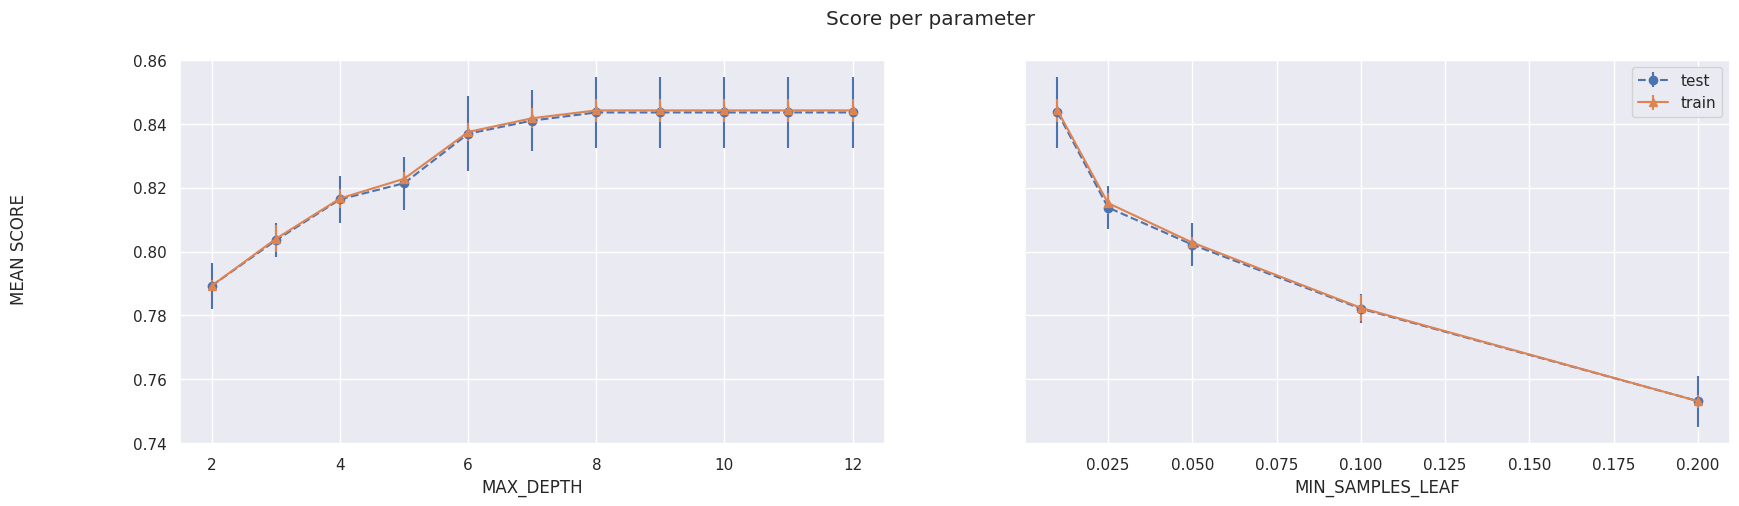

In [39]:

# Calling Method
plot_search_results(GridSearch)


In [40]:
# Entrenamiento Óptimizado

dtree = DecisionTreeClassifier(max_depth = 6,
                               min_samples_leaf = 0.01,
                               random_state = 123)

dtree = dtree.fit(X_train_res, y_train_res)

dtree

DecisionTreeClassifier(max_depth=6, min_samples_leaf=0.01, random_state=123)

In [41]:
# Graficando resultados

from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

dot_data = export_graphviz(dtree,
                           feature_names = features,
                           filled = True,
                           rounded = True,
                           special_characters = True)

graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')
print(graph)

<b>Bondad de ajuste</b>

In [42]:
# Usando el modelo para predecir

X_train['probability'] = dtree.predict_proba(X_train[features])[:,1]
X_test['probability']  = dtree.predict_proba(X_test[features])[:,1]

X_train['prediction'] = dtree.predict(X_train[features])
X_test['prediction']  = dtree.predict(X_test[features])


In [43]:
#Resumen de todas las métricas del modelo

metricsDtreeOpt = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'dTree_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'dTree_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metricsDtreeOpt

,metric,dTree_train,dTree_test
0,AUC,0.808261,0.798188
1,Gini,0.616523,0.596376
2,Accuracy,0.819127,0.818776
3,Precision,0.133041,0.129727
4,Recall,0.647198,0.627494
5,F1-score,0.220711,0.215005


In [44]:
pd.merge(metricsDtree_smote, metricsDtreeOpt, on = 'metric', how='left')

,metric,dTree_smote_train,dTree_smote_test,dTree_train,dTree_test
0,AUC,0.800894,0.799110,0.808261,0.798188
1,Gini,0.601789,0.598221,0.616523,0.596376
2,Accuracy,0.783309,0.788389,0.819127,0.818776
3,Precision,0.112491,0.115143,0.133041,0.129727
4,Recall,0.649573,0.650776,0.647198,0.627494
5,F1-score,0.191771,0.195667,0.220711,0.215005


<b>Importancias del modelo</b>

In [45]:
# Muestreo de data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 123)

In [46]:

importances = pd.DataFrame({'features' : X_train.columns.tolist() ,
                            'importance' : dtree.feature_importances_}).sort_values('importance', ascending = False)

importances.loc[importances.importance > 0]

,features,importance
65,ind_var30,0.489974
331,var15,0.279941
304,imp_op_var41_efect_ult3,0.044416
330,var38,0.039116
306,saldo_var42,0.035197
250,saldo_var30,0.032982
325,saldo_var37,0.021745
107,ind_var37_cte,0.018887
352,num_var22_ult3,0.015894
321,num_var22_ult1,0.006266


# Random Forest

In [47]:
# Muestreo de data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 123)



In [48]:
# Cargando librerías

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import time


In [49]:
# Configurando modelo de random forest

rfc = RandomForestClassifier(n_estimators = 100,
                             max_depth = 6,
                             min_samples_leaf = 0.01,
                             class_weight = {0: 1, 1: 24.267},
                             oob_score = True,
                             verbose = 1,
                             n_jobs = 4,
                             random_state = 123)

#oob_score: Out of bagging score, es el desempeño del modelo en la muestra que se
#queda fuera del proceso de extraccion de subespacios de la data
#es importante analizarlo por si el modelo deja fuera algunas caracteristicas importantes de la data

In [50]:
import multiprocessing
multiprocessing.cpu_count()

2

In [51]:

start_time = time.time()
rfc = rfc.fit(X_train, y_train)
print("----%s seconds ---" % ((time.time() - start_time)))


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    3.2s finished


----6.3807454109191895 seconds ---


In [52]:
importances = pd.DataFrame({'features' : X_train.columns.tolist() ,
                            'importance' : rfc.feature_importances_}).sort_values('importance', ascending = False)

importances.loc[importances.importance > 0]

,features,importance
331,var15,1.249504e-01
250,saldo_var30,1.004268e-01
240,saldo_medio_var5_ult1,7.393134e-02
55,saldo_var5,6.982794e-02
142,num_meses_var5_ult3,5.112134e-02
...,...,...
50,ind_var37,4.083768e-05
203,ind_var43_emit_ult1,3.481072e-05
359,ind_var26,2.397199e-05
285,saldo_medio_var8_hace2,1.074861e-05


In [53]:
# Usando el modelo para predecir

X_train['probability'] = rfc.predict_proba(X_train[features])[:,1]
X_test['probability']  = rfc.predict_proba(X_test[features])[:,1]

X_train['prediction'] = rfc.predict(X_train[features])
X_test['prediction']  = rfc.predict(X_test[features])



[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [54]:
#Resumen de todas las métricas del modelo

metricsRfc = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'rfc_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'rfc_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})


metricsRes = pd.merge(metricsDtree_smote, metricsRfc, on = 'metric', how='left')
metricsRes

,metric,dTree_smote_train,dTree_smote_test,rfc_train,rfc_test
0,AUC,0.800894,0.799110,0.802412,0.800308
1,Gini,0.601789,0.598221,0.604823,0.600617
2,Accuracy,0.783309,0.788389,0.711204,0.710866
3,Precision,0.112491,0.115143,0.090881,0.091327
4,Recall,0.649573,0.650776,0.699430,0.705100
5,F1-score,0.191771,0.195667,0.160861,0.161709


# AdaBoost

In [55]:
# Muestreo de data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 123)


In [56]:
# Cargando librerías

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import time


In [57]:
# Configuramos el modelo de adaboost

ada_clf = AdaBoostClassifier(
          DecisionTreeClassifier(max_depth = 1),
          n_estimators = 200,
          algorithm = 'SAMME.R',
          learning_rate = 0.5,
          random_state = 123)


In [58]:
start_time = time.time()
ada_clf.fit(X_train, y_train)
print("----%s seconds ---" % ((time.time() - start_time)))


----52.892929553985596 seconds ---


In [59]:
importances = pd.DataFrame({'features' : X_train.columns.tolist() ,
                            'importance' : ada_clf.feature_importances_}).sort_values('importance', ascending = False)

importances.loc[importances.importance > 0]

,features,importance
330,var38,0.075
331,var15,0.065
250,saldo_var30,0.050
141,saldo_medio_var5_hace3,0.050
312,imp_op_var39_comer_ult1,0.040
...,...,...
361,num_op_var39_efect_ult1,0.005
194,saldo_var31,0.005
35,var36,0.005
25,saldo_medio_var13_corto_hace3,0.005


In [60]:
# Usando el modelo para predecir

X_train['probability'] = ada_clf.predict_proba(X_train[features])[:,1]
X_test['probability']  = ada_clf.predict_proba(X_test[features])[:,1]

X_train['prediction'] = ada_clf.predict(X_train[features])
X_test['prediction']  = ada_clf.predict(X_test[features])



In [61]:
#Resumen de todas las métricas del modelo

metricsAdab = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'adab_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'adab_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})


metricsRes = pd.merge(metricsRes, metricsAdab, on = 'metric', how='left')
metricsRes

,metric,dTree_smote_train,dTree_smote_test,rfc_train,rfc_test,adab_train,adab_test
0,AUC,0.800894,0.799110,0.802412,0.800308,0.858622,0.821658
1,Gini,0.601789,0.598221,0.604823,0.600617,0.717244,0.643317
2,Accuracy,0.783309,0.788389,0.711204,0.710866,0.960631,0.960405
3,Precision,0.112491,0.115143,0.090881,0.091327,0.720000,0.444444
4,Recall,0.649573,0.650776,0.699430,0.705100,0.008547,0.004435
5,F1-score,0.191771,0.195667,0.160861,0.161709,0.016893,0.008782


In [62]:
from scipy.stats import ks_2samp
from sklearn.metrics import roc_auc_score
def evaluate_ks_and_roc_auc(y_real, y_proba):
    # Unite both visions to be able to filter
    df = pd.DataFrame()
    df['real'] = y_real
    df['proba'] = y_proba

    # Recover each class
    class0 = df[df['real'] == 0]
    class1 = df[df['real'] == 1]

    ks = ks_2samp(class0['proba'], class1['proba'])
    roc_auc = roc_auc_score(df['real'] , df['proba'])

    print(f"KS: {ks.statistic:.4f} (p-value: {ks.pvalue:.3e})")
    print(f"ROC AUC: {roc_auc:.4f}")
    return ks.statistic, roc_auc

In [63]:
evaluate_ks_and_roc_auc(y_train, X_train.probability)

KS: 0.5658 (p-value: 0.000e+00)
ROC AUC: 0.8586


(0.5658434727465017, 0.858621819864026)

In [64]:
evaluate_ks_and_roc_auc(y_test, X_test.probability)

KS: 0.5142 (p-value: 3.555e-213)
ROC AUC: 0.8217


(0.5142485289568348, 0.8216583622710024)

# XGBoost

In [65]:
# Muestreo de data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y,
                                                    train_size = 0.6,
                                                    random_state = 123)

X_watch, X_test, y_watch, y_test = train_test_split(X_test, y_test,
                                                    stratify = y_test,
                                                    train_size = 0.5,
                                                    random_state = 123)


In [66]:
# Cargando librerías

import numpy as np
import xgboost as xgb


In [67]:

dtrain = xgb.DMatrix(X_train, label = y_train)
dwatch = xgb.DMatrix(X_watch, label = y_watch)
dtest  = xgb.DMatrix(X_test, label = y_test)


In [68]:
# Definiendo parámetros

param = {'objetive' : 'binary_logistic',
         'max_depth' : 8,
         'learning_rate': 0.05,
         'min_data_leaf' : 0.05,
         'grow_policy' : 'lossguide',
         'seed' : 123}

param['eval_metric'] = 'auc'
num_round = 300
evallist = [(dtrain,'train'), (dwatch,'watchlist')]



In [69]:
import time

start_time = time.time()
xgBoost = xgb.train(param, dtrain, num_round, evallist,
                    early_stopping_rounds = 5)
print("----%s seconds ---" % ((time.time() - start_time)))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:14:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	train-auc:0.85885	watchlist-auc:0.79640
[1]	train-auc:0.85917	watchlist-auc:0.80018
[2]	train-auc:0.86027	watchlist-auc:0.80299
[3]	train-auc:0.86116	watchlist-auc:0.80349
[4]	train-auc:0.86316	watchlist-auc:0.80403
[5]	train-auc:0.86385	watchlist-auc:0.80564
[6]	train-auc:0.86579	watchlist-auc:0.80654
[7]	train-auc:0.86792	watchlist-auc:0.80774
[8]	train-auc:0.86895	watchlist-auc:0.80797
[9]	train-auc:0.87122	watchlist-auc:0.80794
[10]	train-auc:0.87297	watchlist-auc:0.80694
[11]	train-auc:0.87384	watchlist-auc:0.80722
[12]	train-auc:0.87551	watchlist-auc:0.80748
----2.6756114959716797 seconds ---


<b>Variables del Modelo</b>

In [70]:
importance = xgBoost.get_score(importance_type = 'total_gain')
importance

{'num_ent_var16_ult1': 16.015960693359375,
 'num_var12_0': 4.5138115882873535,
 'imp_op_var40_comer_ult1': 2.6513586044311523,
 'imp_op_var41_comer_ult3': 34.33928680419922,
 'saldo_medio_var44_ult1': 0.2858647108078003,
 'num_var42': 0.964078426361084,
 'imp_var43_emit_ult1': 27.71434783935547,
 'ind_var24_0': 0.6261751651763916,
 'ind_var40_0': 8.73025894165039,
 'num_var8': 0.0005532260984182358,
 'num_var8_0': 6.621120452880859,
 'num_var30': 6.356812000274658,
 'ind_var9_cte_ult1': 0.006468072533607483,
 'saldo_medio_var17_ult3': 3.740096092224121,
 'num_op_var41_ult1': 12.189414024353027,
 'var36': 6.804825305938721,
 'num_meses_var8_ult3': 7.101820945739746,
 'num_op_var40_efect_ult1': 4.688697814941406,
 'imp_trans_var37_ult1': 15.644633293151855,
 'ind_var37': 6.953310012817383,
 'saldo_var5': 8.522821426391602,
 'saldo_var12': 0.29341593384742737,
 'num_var30_0': 2.8587310314178467,
 'ind_var26_cte': 44.07667541503906,
 'num_op_var41_ult3': 9.786308288574219,
 'ind_var10cte_u

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

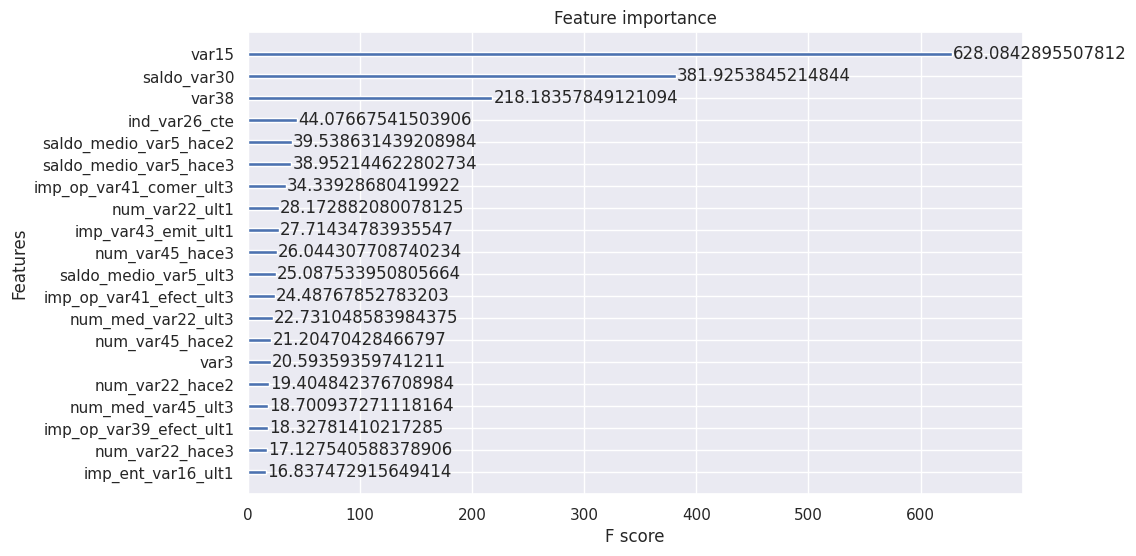

In [71]:
xgb.plot_importance(xgBoost, max_num_features=20, importance_type = 'total_gain')

In [72]:
pdVarImp = pd.DataFrame({'Feature': list(importance.keys()),
                         'Importance' : list(importance.values())}).sort_values('Importance', ascending = False)

pdVarImp['C'] = np.arange(len(pdVarImp)) + 1
pdVarImp

,Feature,Importance,C
84,var15,628.084290,1
70,saldo_var30,381.925385,2
83,var38,218.183578,3
23,ind_var26_cte,44.076675,4
33,saldo_medio_var5_hace2,39.538631,5
...,...,...,...
21,saldo_var12,0.293416,87
4,saldo_medio_var44_ult1,0.285865,88
55,num_var37_med_ult2,0.124624,89
12,ind_var9_cte_ult1,0.006468,90


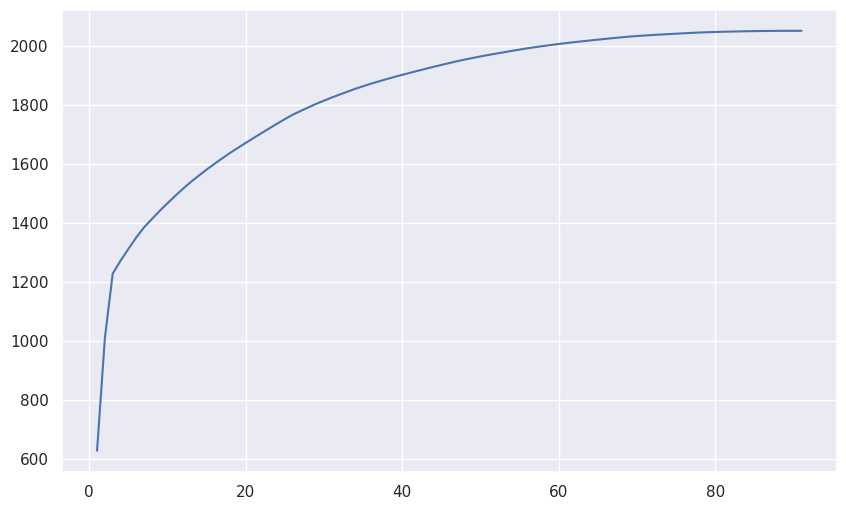

In [73]:
plt.plot(pdVarImp.C,pdVarImp.Importance.cumsum(axis=0))

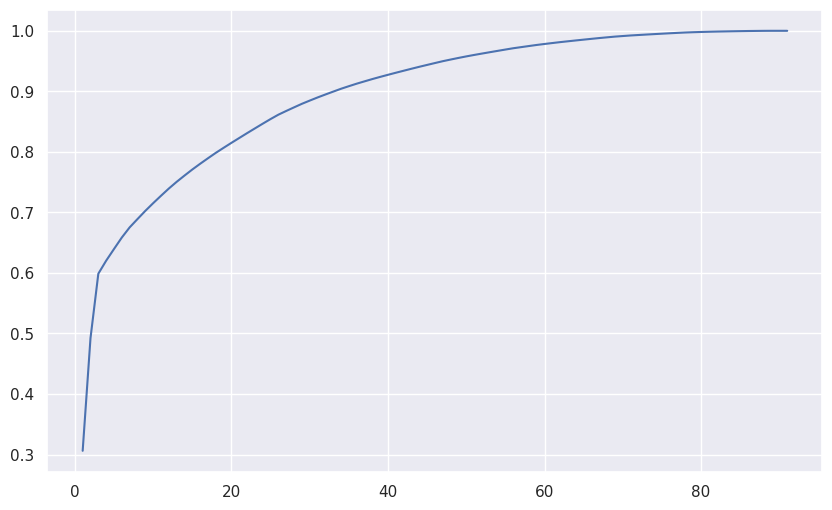

In [74]:
pdVarImp['porc_gain'] = pdVarImp.Importance.apply(lambda x: x/pdVarImp.Importance.sum())
plt.plot(pdVarImp.C,pdVarImp.porc_gain.cumsum(axis=0))

In [75]:
pdVarImp['porc_gain_acum'] = pdVarImp.porc_gain.cumsum(axis = 0)


In [76]:
pdVarImp.loc[pdVarImp.porc_gain_acum <= 0.95]

,Feature,Importance,C,porc_gain,porc_gain_acum
84,var15,628.084290,1,0.306201,0.306201
70,saldo_var30,381.925385,2,0.186195,0.492396
83,var38,218.183578,3,0.106368,0.598764
23,ind_var26_cte,44.076675,4,0.021488,0.620252
33,saldo_medio_var5_hace2,39.538631,5,0.019276,0.639527
46,saldo_medio_var5_hace3,38.952145,6,0.018990,0.658517
3,imp_op_var41_comer_ult3,34.339287,7,0.016741,0.675258
80,num_var22_ult1,28.172882,8,0.013735,0.688993
6,imp_var43_emit_ult1,27.714348,9,0.013511,0.702504
81,num_var45_hace3,26.044308,10,0.012697,0.715201


In [77]:
pdVarImp.transpose()

,84,70,83,23,33,46,3,80,6,81,...,7,35,65,59,62,21,4,55,12,9
Feature,var15,saldo_var30,var38,ind_var26_cte,saldo_medio_var5_hace2,saldo_medio_var5_hace3,imp_op_var41_comer_ult3,num_var22_ult1,imp_var43_emit_ult1,num_var45_hace3,...,ind_var24_0,num_op_var40_hace2,saldo_medio_var12_hace2,num_op_var41_comer_ult3,saldo_medio_var8_hace3,saldo_var12,saldo_medio_var44_ult1,num_var37_med_ult2,ind_var9_cte_ult1,num_var8
Importance,628.08429,381.925385,218.183578,44.076675,39.538631,38.952145,34.339287,28.172882,27.714348,26.044308,...,0.626175,0.518628,0.5095,0.444144,0.422288,0.293416,0.285865,0.124624,0.006468,0.000553
C,1,2,3,4,5,6,7,8,9,10,...,82,83,84,85,86,87,88,89,90,91
porc_gain,0.306201,0.186195,0.106368,0.021488,0.019276,0.01899,0.016741,0.013735,0.013511,0.012697,...,0.000305,0.000253,0.000248,0.000217,0.000206,0.000143,0.000139,0.000061,0.000003,0.0
porc_gain_acum,0.306201,0.492396,0.598764,0.620252,0.639527,0.658517,0.675258,0.688993,0.702504,0.715201,...,0.99873,0.998983,0.999231,0.999448,0.999653,0.999796,0.999936,0.999997,1.0,1.0


In [78]:
# Usando el modelo para predecir

X_train['probability']  = xgBoost.predict(xgb.DMatrix(X_train[features]))
X_test['probability'] = xgBoost.predict(xgb.DMatrix(X_test[features]))

X_train['prediction']  = X_train.probability.apply(lambda x: 1 if x > 0.5 else 0)
X_test['prediction'] = X_test.probability.apply(lambda x: 1 if x > 0.5 else 0)

In [79]:
#Resumen de todas las métricas del modelo
from sklearn.metrics import *

metricsXGB = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'xgb_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'xgb_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metricsXGB
metricsRes = pd.merge(metricsRes, metricsXGB, on = 'metric', how='left')
metricsRes

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,metric,dTree_smote_train,dTree_smote_test,rfc_train,rfc_test,adab_train,adab_test,xgb_train,xgb_test
0,AUC,0.800894,0.799110,0.802412,0.800308,0.858622,0.821658,0.876160,0.843610
1,Gini,0.601789,0.598221,0.604823,0.600617,0.717244,0.643317,0.752321,0.687219
2,Accuracy,0.783309,0.788389,0.711204,0.710866,0.960631,0.960405,0.960427,0.960471
3,Precision,0.112491,0.115143,0.090881,0.091327,0.720000,0.444444,0.000000,0.000000
4,Recall,0.649573,0.650776,0.699430,0.705100,0.008547,0.004435,0.000000,0.000000
5,F1-score,0.191771,0.195667,0.160861,0.161709,0.016893,0.008782,0.000000,0.000000


#Grid Search

# Random Search

In [80]:
# Muestreo de data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 123)


In [81]:
# setear valores iniciales

paramGrid = {'objetive' : ['binary_logistic'],
         'max_depth' : [2,3,4,5,6,7,8,9,10,11,12],
         'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.2],
         'seed' : [123],
         'max_leaves' : [2, 4, 8],
         'min_data_leaf' : [0.01, 0.02, 0.05, 0.08, 0.1, 0.15, 0.2],
         'grow_policy' : ['lossguide'],
         'min_child_weight' : [1,2,3,4,5,6,7,8,9,10]}

param['eval_metric'] = 'auc'
num_round = 100

pdResults = pd.DataFrame()



In [82]:
12*5*3*7*10*100

1260000

In [83]:
dtrain = xgb.DMatrix(X_train, label = y_train)
dtest  = xgb.DMatrix(X_test, label = y_test)

In [84]:
# Iniciar iteración de Hyperparámetros
import random

for i in range(100):
  print("****** Iteration : " + str(i))
  param = {}
  for paramName, paramValue in paramGrid.items():
    param[paramName] = random.choice(paramValue)
  param['eval_metric' ] = 'auc'
  evallist = [(dtrain,'train'),(dtest,'valid')]
  num_round = 10

  bst = xgb.train(param, dtrain, num_round, evallist, verbose_eval = 5)

  y_train_pred = bst.predict(dtrain)
  y_test_pred = bst.predict(dtest)

  giniTrain = ((roc_auc_score(y_train, y_train_pred) - 0.5)*200)
  giniTest =  ((roc_auc_score(y_test, y_test_pred) - 0.5)*200)

  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
                                             'paramName': list(param.keys()),
                                             'paramValue': list(param.values()),
                                             'giniTrain' : giniTrain,
                                             'giniTest' : giniTest}))

  pdResults.to_csv('HyperParamSearch.csv', index = False)

****** Iteration : 0


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:16:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	train-auc:0.77469	valid-auc:0.76487
[5]	train-auc:0.77625	valid-auc:0.76587
[9]	train-auc:0.77625	valid-auc:0.76587
****** Iteration : 1
[0]	train-auc:0.71973	valid-auc:0.72023


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:16:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.80294	valid-auc:0.79615
[9]	train-auc:0.81364	valid-auc:0.80049
****** Iteration : 2
[0]	train-auc:0.68001	valid-auc:0.68201


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:16:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.76238	valid-auc:0.76402
[9]	train-auc:0.76238	valid-auc:0.76402
****** Iteration : 3
[0]	train-auc:0.68001	valid-auc:0.68201


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:16:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.75935	valid-auc:0.76225
[9]	train-auc:0.76238	valid-auc:0.76402
****** Iteration : 4
[0]	train-auc:0.77469	valid-auc:0.76487


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:16:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.77469	valid-auc:0.76487
[9]	train-auc:0.77469	valid-auc:0.76487
****** Iteration : 5
[0]	train-auc:0.71973	valid-auc:0.72023


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:16:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.72105	valid-auc:0.72176
[9]	train-auc:0.72105	valid-auc:0.72176
****** Iteration : 6
[0]	train-auc:0.71973	valid-auc:0.72023


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:16:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.81212	valid-auc:0.79829
[9]	train-auc:0.82699	valid-auc:0.81332
****** Iteration : 7
[0]	train-auc:0.68001	valid-auc:0.68201


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:16:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.76238	valid-auc:0.76402
[9]	train-auc:0.76238	valid-auc:0.76402
****** Iteration : 8
[0]	train-auc:0.80668	valid-auc:0.78712


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:16:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.81381	valid-auc:0.79593
[9]	train-auc:0.81822	valid-auc:0.80115
****** Iteration : 9
[0]	train-auc:0.80405	valid-auc:0.78779


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:16:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.81736	valid-auc:0.80116
[9]	train-auc:0.81863	valid-auc:0.80248


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:16:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


****** Iteration : 10
[0]	train-auc:0.71973	valid-auc:0.72023
[5]	train-auc:0.81212	valid-auc:0.79829
[9]	train-auc:0.82699	valid-auc:0.81332
****** Iteration : 11
[0]	train-auc:0.80668	valid-auc:0.78712


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:16:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.82228	valid-auc:0.80420
[9]	train-auc:0.82601	valid-auc:0.80865
****** Iteration : 12


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:16:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	train-auc:0.71973	valid-auc:0.72023
[5]	train-auc:0.72155	valid-auc:0.72203
[9]	train-auc:0.72155	valid-auc:0.72203
****** Iteration : 13
[0]	train-auc:0.80405	valid-auc:0.78779


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:16:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.81736	valid-auc:0.80116
[9]	train-auc:0.81863	valid-auc:0.80248
****** Iteration : 14
[0]	train-auc:0.80405	valid-auc:0.78779


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:16:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.82493	valid-auc:0.81006
[9]	train-auc:0.82736	valid-auc:0.81103
****** Iteration : 15
[0]	train-auc:0.71973	valid-auc:0.72023


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:16:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.72105	valid-auc:0.72176
[9]	train-auc:0.72105	valid-auc:0.72176
****** Iteration : 16
[0]	train-auc:0.80405	valid-auc:0.78779


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:16:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.80699	valid-auc:0.79053
[9]	train-auc:0.81193	valid-auc:0.79557
****** Iteration : 17
[0]	train-auc:0.71973	valid-auc:0.72023


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:16:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.72105	valid-auc:0.72176
[9]	train-auc:0.72105	valid-auc:0.72176
****** Iteration : 18
[0]	train-auc:0.71973	valid-auc:0.72023


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:16:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.72105	valid-auc:0.72176
[9]	train-auc:0.72105	valid-auc:0.72176
****** Iteration : 19
[0]	train-auc:0.71973	valid-auc:0.72023


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:16:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.72155	valid-auc:0.72203
[9]	train-auc:0.72155	valid-auc:0.72203
****** Iteration : 20
[0]	train-auc:0.80405	valid-auc:0.78779


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:16:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.83142	valid-auc:0.81198
[9]	train-auc:0.84000	valid-auc:0.81899
****** Iteration : 21


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:16:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	train-auc:0.80405	valid-auc:0.78779
[5]	train-auc:0.83142	valid-auc:0.81198
[9]	train-auc:0.84000	valid-auc:0.81899
****** Iteration : 22
[0]	train-auc:0.68001	valid-auc:0.68201


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:16:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.76480	valid-auc:0.76407
[9]	train-auc:0.78172	valid-auc:0.77626
****** Iteration : 23
[0]	train-auc:0.71973	valid-auc:0.72023


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:16:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.72155	valid-auc:0.72203
[9]	train-auc:0.72155	valid-auc:0.72203
****** Iteration : 24
[0]	train-auc:0.71973	valid-auc:0.72023


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:16:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.81212	valid-auc:0.79829
[9]	train-auc:0.82699	valid-auc:0.81332
****** Iteration : 25
[0]	train-auc:0.77469	valid-auc:0.76487


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:16:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.77469	valid-auc:0.76487
[9]	train-auc:0.77469	valid-auc:0.76487
****** Iteration : 26
[0]	train-auc:0.80405	valid-auc:0.78779


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:16:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.80405	valid-auc:0.78779
[9]	train-auc:0.80866	valid-auc:0.79265
****** Iteration : 27
[0]	train-auc:0.68001	valid-auc:0.68201


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:16:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.75935	valid-auc:0.76225
[9]	train-auc:0.76238	valid-auc:0.76402
****** Iteration : 28
[0]	train-auc:0.68001	valid-auc:0.68201


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:16:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.76480	valid-auc:0.76407
[9]	train-auc:0.78172	valid-auc:0.77626
****** Iteration : 29
[0]	train-auc:0.80405	valid-auc:0.78779


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:16:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.81736	valid-auc:0.80116
[9]	train-auc:0.81863	valid-auc:0.80248
****** Iteration : 30
[0]	train-auc:0.68001	valid-auc:0.68201


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:16:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.76480	valid-auc:0.76407
[9]	train-auc:0.78172	valid-auc:0.77626
****** Iteration : 31
[0]	train-auc:0.71973	valid-auc:0.72023


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:16:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.80294	valid-auc:0.79615
[9]	train-auc:0.81364	valid-auc:0.80049
****** Iteration : 32
[0]	train-auc:0.71973	valid-auc:0.72023


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:16:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.72105	valid-auc:0.72176
[9]	train-auc:0.72105	valid-auc:0.72176
****** Iteration : 33
[0]	train-auc:0.71973	valid-auc:0.72023


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:16:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.72162	valid-auc:0.72184
[9]	train-auc:0.80169	valid-auc:0.79535
****** Iteration : 34
[0]	train-auc:0.68001	valid-auc:0.68201


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.68001	valid-auc:0.68201
[9]	train-auc:0.75935	valid-auc:0.76225
****** Iteration : 35
[0]	train-auc:0.68001	valid-auc:0.68201


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.76480	valid-auc:0.76407
[9]	train-auc:0.78172	valid-auc:0.77626
****** Iteration : 36
[0]	train-auc:0.71973	valid-auc:0.72023


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.72155	valid-auc:0.72203
[9]	train-auc:0.72155	valid-auc:0.72203
****** Iteration : 37
[0]	train-auc:0.80405	valid-auc:0.78779


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.81736	valid-auc:0.80116
[9]	train-auc:0.81863	valid-auc:0.80248
****** Iteration : 38
[0]	train-auc:0.71973	valid-auc:0.72023


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.80294	valid-auc:0.79615
[9]	train-auc:0.81364	valid-auc:0.80049
****** Iteration : 39
[0]	train-auc:0.80405	valid-auc:0.78779


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.82493	valid-auc:0.81006
[9]	train-auc:0.82736	valid-auc:0.81103
****** Iteration : 40
[0]	train-auc:0.71973	valid-auc:0.72023


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.72162	valid-auc:0.72184
[9]	train-auc:0.80169	valid-auc:0.79535
****** Iteration : 41
[0]	train-auc:0.68001	valid-auc:0.68201


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.68001	valid-auc:0.68201
[9]	train-auc:0.75935	valid-auc:0.76225
****** Iteration : 42
[0]	train-auc:0.68001	valid-auc:0.68201


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.68001	valid-auc:0.68201
[9]	train-auc:0.68001	valid-auc:0.68201
****** Iteration : 43
[0]	train-auc:0.71973	valid-auc:0.72023


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.72155	valid-auc:0.72203
[9]	train-auc:0.72155	valid-auc:0.72203
****** Iteration : 44
[0]	train-auc:0.71973	valid-auc:0.72023


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.80294	valid-auc:0.79615
[9]	train-auc:0.81364	valid-auc:0.80049
****** Iteration : 45
[0]	train-auc:0.71973	valid-auc:0.72023


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.72155	valid-auc:0.72203
[9]	train-auc:0.72155	valid-auc:0.72203
****** Iteration : 46
[0]	train-auc:0.71973	valid-auc:0.72023


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.80294	valid-auc:0.79615
[9]	train-auc:0.81364	valid-auc:0.80049
****** Iteration : 47
[0]	train-auc:0.80405	valid-auc:0.78779


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.80699	valid-auc:0.79053
[9]	train-auc:0.81193	valid-auc:0.79557
****** Iteration : 48
[0]	train-auc:0.80405	valid-auc:0.78779


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.83172	valid-auc:0.81488
[9]	train-auc:0.83860	valid-auc:0.81773
****** Iteration : 49
[0]	train-auc:0.71973	valid-auc:0.72023


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.72162	valid-auc:0.72184
[9]	train-auc:0.80169	valid-auc:0.79535
****** Iteration : 50
[0]	train-auc:0.68001	valid-auc:0.68201


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:12] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.76480	valid-auc:0.76407
[9]	train-auc:0.78172	valid-auc:0.77626
****** Iteration : 51
[0]	train-auc:0.68001	valid-auc:0.68201


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.76238	valid-auc:0.76402
[9]	train-auc:0.76238	valid-auc:0.76402
****** Iteration : 52
[0]	train-auc:0.71973	valid-auc:0.72023


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.72105	valid-auc:0.72176
[9]	train-auc:0.72105	valid-auc:0.72176
****** Iteration : 53
[0]	train-auc:0.68001	valid-auc:0.68201


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.76480	valid-auc:0.76407
[9]	train-auc:0.78172	valid-auc:0.77626
****** Iteration : 54
[0]	train-auc:0.71973	valid-auc:0.72023


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:14] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.72155	valid-auc:0.72203
[9]	train-auc:0.72155	valid-auc:0.72203
****** Iteration : 55
[0]	train-auc:0.77469	valid-auc:0.76487


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.81948	valid-auc:0.80694
[9]	train-auc:0.82686	valid-auc:0.81409
****** Iteration : 56
[0]	train-auc:0.68001	valid-auc:0.68201


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.75935	valid-auc:0.76225
[9]	train-auc:0.76238	valid-auc:0.76402
****** Iteration : 57
[0]	train-auc:0.68001	valid-auc:0.68201


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.75935	valid-auc:0.76225
[9]	train-auc:0.76238	valid-auc:0.76402
****** Iteration : 58
[0]	train-auc:0.68001	valid-auc:0.68201


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.76480	valid-auc:0.76407
[9]	train-auc:0.78172	valid-auc:0.77626
****** Iteration : 59


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	train-auc:0.80405	valid-auc:0.78779
[5]	train-auc:0.81903	valid-auc:0.80317
[9]	train-auc:0.82593	valid-auc:0.80929
****** Iteration : 60
[0]	train-auc:0.68001	valid-auc:0.68201


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.68001	valid-auc:0.68201
[9]	train-auc:0.75935	valid-auc:0.76225
****** Iteration : 61
[0]	train-auc:0.71973	valid-auc:0.72023


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.81212	valid-auc:0.79829
[9]	train-auc:0.82699	valid-auc:0.81332
****** Iteration : 62
[0]	train-auc:0.68001	valid-auc:0.68201


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.68001	valid-auc:0.68201
[9]	train-auc:0.68001	valid-auc:0.68201
****** Iteration : 63
[0]	train-auc:0.68001	valid-auc:0.68201


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.76480	valid-auc:0.76407
[9]	train-auc:0.78172	valid-auc:0.77626
****** Iteration : 64
[0]	train-auc:0.68001	valid-auc:0.68201


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.68001	valid-auc:0.68201
[9]	train-auc:0.75935	valid-auc:0.76225
****** Iteration : 65
[0]	train-auc:0.68001	valid-auc:0.68201


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.75935	valid-auc:0.76225
[9]	train-auc:0.76238	valid-auc:0.76402
****** Iteration : 66
[0]	train-auc:0.80405	valid-auc:0.78779


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.81715	valid-auc:0.80116
[9]	train-auc:0.82341	valid-auc:0.80900
****** Iteration : 67
[0]	train-auc:0.68001	valid-auc:0.68201


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.75935	valid-auc:0.76225
[9]	train-auc:0.76238	valid-auc:0.76402
****** Iteration : 68
[0]	train-auc:0.71973	valid-auc:0.72023


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.81212	valid-auc:0.79829
[9]	train-auc:0.82699	valid-auc:0.81332
****** Iteration : 69
[0]	train-auc:0.71973	valid-auc:0.72023


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.80294	valid-auc:0.79615
[9]	train-auc:0.81364	valid-auc:0.80049
****** Iteration : 70
[0]	train-auc:0.68001	valid-auc:0.68201


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:26] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.68001	valid-auc:0.68201
[9]	train-auc:0.68001	valid-auc:0.68201
****** Iteration : 71
[0]	train-auc:0.71973	valid-auc:0.72023


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.72162	valid-auc:0.72184
[9]	train-auc:0.80169	valid-auc:0.79535
****** Iteration : 72
[0]	train-auc:0.71973	valid-auc:0.72023


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.72105	valid-auc:0.72176
[9]	train-auc:0.72105	valid-auc:0.72176
****** Iteration : 73
[0]	train-auc:0.68001	valid-auc:0.68201


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.75935	valid-auc:0.76225
[9]	train-auc:0.76238	valid-auc:0.76402
****** Iteration : 74
[0]	train-auc:0.71973	valid-auc:0.72023


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:28] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.81212	valid-auc:0.79829
[9]	train-auc:0.82699	valid-auc:0.81332
****** Iteration : 75
[0]	train-auc:0.80405	valid-auc:0.78779


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.81736	valid-auc:0.80116
[9]	train-auc:0.81863	valid-auc:0.80248
****** Iteration : 76
[0]	train-auc:0.80405	valid-auc:0.78779


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.80699	valid-auc:0.79053
[9]	train-auc:0.81193	valid-auc:0.79557
****** Iteration : 77
[0]	train-auc:0.71973	valid-auc:0.72023


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.81212	valid-auc:0.79829
[9]	train-auc:0.82699	valid-auc:0.81332
****** Iteration : 78
[0]	train-auc:0.68001	valid-auc:0.68201


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.76480	valid-auc:0.76407
[9]	train-auc:0.78172	valid-auc:0.77626
****** Iteration : 79


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	train-auc:0.80405	valid-auc:0.78779
[5]	train-auc:0.80699	valid-auc:0.79053
[9]	train-auc:0.81193	valid-auc:0.79557
****** Iteration : 80
[0]	train-auc:0.68001	valid-auc:0.68201


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.76480	valid-auc:0.76407
[9]	train-auc:0.78172	valid-auc:0.77626
****** Iteration : 81
[0]	train-auc:0.77469	valid-auc:0.76487


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.77469	valid-auc:0.76487
[9]	train-auc:0.77469	valid-auc:0.76487
****** Iteration : 82
[0]	train-auc:0.68001	valid-auc:0.68201


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.76480	valid-auc:0.76407
[9]	train-auc:0.78172	valid-auc:0.77626
****** Iteration : 83
[0]	train-auc:0.80405	valid-auc:0.78779


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.82486	valid-auc:0.80981
[9]	train-auc:0.82851	valid-auc:0.81172
****** Iteration : 84
[0]	train-auc:0.68001	valid-auc:0.68201


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.68001	valid-auc:0.68201
[9]	train-auc:0.68001	valid-auc:0.68201
****** Iteration : 85
[0]	train-auc:0.80405	valid-auc:0.78779


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.81736	valid-auc:0.80116
[9]	train-auc:0.81863	valid-auc:0.80248
****** Iteration : 86
[0]	train-auc:0.80405	valid-auc:0.78779


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.83172	valid-auc:0.81488
[9]	train-auc:0.83860	valid-auc:0.81773
****** Iteration : 87
[0]	train-auc:0.68001	valid-auc:0.68201


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.76480	valid-auc:0.76407
[9]	train-auc:0.78172	valid-auc:0.77626
****** Iteration : 88
[0]	train-auc:0.68001	valid-auc:0.68201


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.76238	valid-auc:0.76402
[9]	train-auc:0.76238	valid-auc:0.76402
****** Iteration : 89
[0]	train-auc:0.71973	valid-auc:0.72023


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.72155	valid-auc:0.72203
[9]	train-auc:0.72155	valid-auc:0.72203
****** Iteration : 90
[0]	train-auc:0.80405	valid-auc:0.78779


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.80699	valid-auc:0.79053
[9]	train-auc:0.81193	valid-auc:0.79557
****** Iteration : 91
[0]	train-auc:0.71973	valid-auc:0.72023


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.80294	valid-auc:0.79615
[9]	train-auc:0.81364	valid-auc:0.80049
****** Iteration : 92
[0]	train-auc:0.80405	valid-auc:0.78779


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.83172	valid-auc:0.81488
[9]	train-auc:0.83860	valid-auc:0.81773
****** Iteration : 93
[0]	train-auc:0.80405	valid-auc:0.78779


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.82493	valid-auc:0.81006
[9]	train-auc:0.82736	valid-auc:0.81103
****** Iteration : 94
[0]	train-auc:0.68001	valid-auc:0.68201


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.68001	valid-auc:0.68201
[9]	train-auc:0.68001	valid-auc:0.68201
****** Iteration : 95
[0]	train-auc:0.71973	valid-auc:0.72023


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.72162	valid-auc:0.72184
[9]	train-auc:0.80169	valid-auc:0.79535
****** Iteration : 96
[0]	train-auc:0.71973	valid-auc:0.72023


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.72162	valid-auc:0.72184
[9]	train-auc:0.80169	valid-auc:0.79535
****** Iteration : 97
[0]	train-auc:0.68001	valid-auc:0.68201


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.76480	valid-auc:0.76407
[9]	train-auc:0.78172	valid-auc:0.77626
****** Iteration : 98
[0]	train-auc:0.68001	valid-auc:0.68201


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.75935	valid-auc:0.76225
[9]	train-auc:0.76238	valid-auc:0.76402
****** Iteration : 99
[0]	train-auc:0.80668	valid-auc:0.78712


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:17:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_data_leaf", "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-auc:0.82665	valid-auc:0.80914
[9]	train-auc:0.83554	valid-auc:0.81752


<ipython-input-84-2345e3e9b7ee>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pdResults = pdResults.append(pd.DataFrame({'iter' : i,


In [85]:
pddf = pd.read_csv("HyperParamSearch.csv")
pddf.sort_values('giniTest', ascending=False)

,iter,paramName,paramValue,giniTrain,giniTest
193,21,max_leaves,8,68.000030,63.798429
187,20,min_child_weight,4,68.000030,63.798429
181,20,max_depth,5,68.000030,63.798429
182,20,learning_rate,0.2,68.000030,63.798429
183,20,seed,123,68.000030,63.798429
...,...,...,...,...,...
630,70,objetive,binary_logistic,36.001606,36.401981
631,70,max_depth,4,36.001606,36.401981
846,94,objetive,binary_logistic,36.001606,36.401981
633,70,seed,123,36.001606,36.401981


In [86]:
pddf['overfitting'] = pddf.giniTrain - pddf.giniTest
pddf.sort_values('overfitting')

,iter,paramName,paramValue,giniTrain,giniTest,overfitting
370,41,max_depth,2,51.869143,52.450514,-0.581371
372,41,seed,123,51.869143,52.450514,-0.581371
373,41,max_leaves,2,51.869143,52.450514,-0.581371
374,41,min_data_leaf,0.02,51.869143,52.450514,-0.581371
375,41,grow_policy,lossguide,51.869143,52.450514,-0.581371
...,...,...,...,...,...,...
194,21,min_data_leaf,0.2,68.000030,63.798429,4.201601
193,21,max_leaves,8,68.000030,63.798429,4.201601
192,21,seed,123,68.000030,63.798429,4.201601
190,21,max_depth,5,68.000030,63.798429,4.201601


In [87]:
pddf.loc[pddf.overfitting < 4].sort_values('giniTest', ascending = False)

,iter,paramName,paramValue,giniTrain,giniTest,overfitting
899,99,eval_metric,auc,67.108383,63.503416,3.604966
895,99,max_leaves,8,67.108383,63.503416,3.604966
892,99,max_depth,3,67.108383,63.503416,3.604966
893,99,learning_rate,0.1,67.108383,63.503416,3.604966
894,99,seed,123,67.108383,63.503416,3.604966
...,...,...,...,...,...,...
851,94,min_data_leaf,0.05,36.001606,36.401981,-0.400375
852,94,grow_policy,lossguide,36.001606,36.401981,-0.400375
853,94,min_child_weight,9,36.001606,36.401981,-0.400375
638,70,eval_metric,auc,36.001606,36.401981,-0.400375


In [88]:
import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


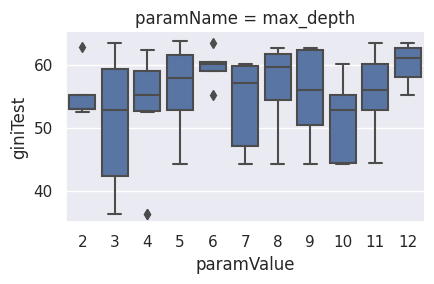

In [89]:
pdResults = pdResults[~pdResults.paramName.isin(['objective', 'eval_metric', 'eta'])]
set(pdResults['paramName'])


sns.FacetGrid(pdResults.loc[pdResults.paramName=='max_depth'],
              row="paramName",
              sharex=False, aspect=1.5).\
          map(sns.boxplot,
              'paramValue',
              'giniTest')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


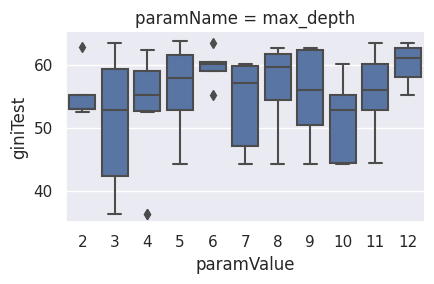

In [90]:
sns.FacetGrid(pdResults.loc[pdResults.paramName=='max_depth'],
              row="paramName",
              sharex=False, aspect=1.5).\
          map(sns.boxplot,
              'paramValue',
              'giniTest')

# Implementación de Modelos

In [91]:
import pickle

In [92]:
xgBoost

In [93]:
objectToSave = xgBoost
filename = "./XGBoost.xgb"
pickle.dump(objectToSave, open(filename, 'wb'))
print("done")

done


In [96]:
loaded_model

In [95]:
filename = "./XGBoost.xgb"
loaded_model = pickle.load(open(filename, 'rb'))

In [97]:
loaded_model

In [98]:
loaded_model.predict(xgb.DMatrix(X_test[features][:1]))


array([0.02265191], dtype=float32)

---

# Gracias por completar este laboratorio!

---

